╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 8. Auto Encoder**
# Section 8. Variational Auto Encoder

### _Objective_
1. AutoEncoder의 Decoder에 집중된 모델인 Variational Auto Encoder에 대해 배워보도록 하겠습니다. <br>
  
╚═════════════════════════════════════════╝

In [0]:
%matplotlib inline

import tensorflow as tf
import math
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os

## MNIST 가져오기

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist_data/")

train_images = mnist.train.images
valid_images = mnist.validation.images
test_images = mnist.test.images

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### [Optional.  Tensorflow Graph Visualization ]

---

> _Jupyter에서 Tensorflow에서 구성되는 Graph를 시각적으로 보여주기 위한 helper 메소드입니다._<br>

In [0]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np    

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))

    display(HTML(iframe))

<br><br>

# \[ 1. Variational Auto Encoder란? \]

----

----

> *이전까지 배운 모델은 어떻게 입력값을 통해 유의미한 Code를 도출하는가에 초점을 맞추어져 있었습니다.* <br>
> *Variational Auto Encoder는 Auto Encoder 중 Decoder에 집중된 모델입니다.*<br>
> *생성 모델 중 하나로 우리는 데이터를 랜덤하게 만들어 낼 수 있습니다.*<br> 


## 2. Variational Auto Encoder 구성하기
---

* Variational Auto Encoder는 수학적으로 난해한 모델 중 하나입니다.<br>
* Variational Auto Encoder는 Code의 분포가 정규 분포가 되도록 모델링을 합니다.<br>
* Variatoinal Auto Encoder는 주어진 입력에 대한 Code를 바로 만드는 대신, <br>
평균 코딩($\mu$)와 표준편차 ($\sigma$)를 만듭니다. 

### (1) 인코더 구성하기

In [0]:
graph = tf.Graph()

num_input =784
num_hidden1 = 500
num_hidden2 = 500
num_hidden3 = 2

with graph.as_default():
    x = tf.placeholder(tf.float32, shape=(None,num_input),
                       name='x')
    lr = tf.placeholder_with_default(0.01, None, 
                                     name='learning_rate')
    encoded_1 = #fix me #
    encoded_2 = #fix me #

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
show_graph(graph)

### (2) Reparameterization Trick 구현하기

우리는 인코더에서 만들어낸 code의 평균과 표준편차에서, 하나의 Code를 랜덤하게 추출하게 됩니다.<br>
이렇게 랜덤하게 추출하게 되더라도, 아 잠재 공간 내 이미지들은 유사해야한다는 가정이 있어,<br>
Decoder는 원래 이미지로 복원하는 방향으로 학습되게 됩니다.

In [0]:
with graph.as_default():
    with tf.variable_scope("reparameterization_trick"):
        code_mean = #fix me#
        code_sigma = #fix me#
        noise = #fix me#
        sampled_code = #fix me#
    sampled_code = tf.identity(sampled_code,"sampled_code")

In [0]:
show_graph(graph)

### (3) Decoder 구성하기

여느 Stacked Auto Encoder와 같이 복원하는 방향으로 학습하게 됩니다.

In [1]:
with graph.as_default():
    decoded_2 = #fix me#
    decoded_1 = #fix me#
    logits = #fix me#
    outputs = #fix me#

SyntaxError: ignored

In [0]:
show_graph(graph)

### (4) Loss 구성하기

Sparse Autoencoder와 같이, 우리는 랜덤하게 뽑아진 Code의 분포가 정규분포의 형태를 지켰는지에 대해 Regularization 손실을 걸어주게 됩니다.<br>

In [0]:
epsilon = 1e-8
with graph.as_default():        
    with tf.variable_scope("losses"):
        reconstruction_loss = #fix me#
        reconstruction_loss = #fix me#
        with tf.variable_scope("kl_divergence"):
            latent_loss = #fix me#
            latent_loss = #fix me#
        loss = #fix me#

In [0]:
show_graph(graph)

### (5) 학습을 위한 operation 구성하기

In [0]:
with graph.as_default():
    with tf.variable_scope('metric'):
        mse = #fix me#
        rmse = #fix me#
        
    with tf.variable_scope('train'):
        train_op = #fix me#

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [0]:
show_graph(graph)

### (6) 모델 학습시키기

In [0]:
num_epoch = 100 # epoch 횟수
num_batch = 128 # 배치 크기
num_data = mnist.train.num_examples # data의 수
num_step = num_data // num_batch # 1 epoch 별 학습 횟수

with graph.as_default():
    sess = tf.Session(graph=graph)
    
    sess.run(tf.global_variables_initializer())
    for i in range(num_epoch):        
        for _ in range(num_step):
            images, _ = mnist.train.next_batch(num_batch)
            sess.run(train_op, feed_dict={x:images,lr:0.001})
        
        rec, lat, tot, rmse_value = sess.run(
            [reconstruction_loss,latent_loss, loss, rmse], 
            feed_dict={x:valid_images})
        print("{:2d}th epoch 전체 손실 : {:.3f}, 재구성 손실 : {:.3f} 잠재 손실 : {:.3f} RMSE : {:.3f}"
              .format(i,tot,rec,lat, rmse_value))

 0th epoch 전체 손실 : 166.861, 재구성 손실 : 162.712 잠재 손실 : 4.148 RMSE : 0.223
 1th epoch 전체 손실 : 159.998, 재구성 손실 : 154.933 잠재 손실 : 5.065 RMSE : 0.215
 2th epoch 전체 손실 : 156.743, 재구성 손실 : 151.383 잠재 손실 : 5.359 RMSE : 0.211
 3th epoch 전체 손실 : 153.465, 재구성 손실 : 147.985 잠재 손실 : 5.480 RMSE : 0.207
 4th epoch 전체 손실 : 152.743, 재구성 손실 : 146.988 잠재 손실 : 5.755 RMSE : 0.206
 5th epoch 전체 손실 : 150.990, 재구성 손실 : 145.174 잠재 손실 : 5.815 RMSE : 0.204
 6th epoch 전체 손실 : 150.397, 재구성 손실 : 144.394 잠재 손실 : 6.002 RMSE : 0.203
 7th epoch 전체 손실 : 149.109, 재구성 손실 : 143.037 잠재 손실 : 6.071 RMSE : 0.202
 8th epoch 전체 손실 : 149.398, 재구성 손실 : 143.226 잠재 손실 : 6.172 RMSE : 0.202
 9th epoch 전체 손실 : 148.018, 재구성 손실 : 142.092 잠재 손실 : 5.926 RMSE : 0.200
10th epoch 전체 손실 : 147.901, 재구성 손실 : 141.663 잠재 손실 : 6.238 RMSE : 0.200
11th epoch 전체 손실 : 146.861, 재구성 손실 : 140.594 잠재 손실 : 6.267 RMSE : 0.199
12th epoch 전체 손실 : 146.256, 재구성 손실 : 140.122 잠재 손실 : 6.135 RMSE : 0.198
13th epoch 전체 손실 : 145.536, 재구성 손실 : 139.368 잠재 손실 : 6.168 RMSE 

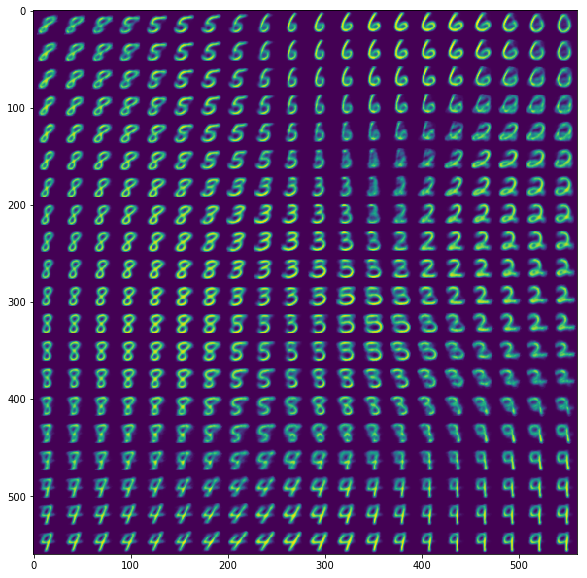

In [0]:
ys,xs = np.mgrid[1:-1:-0.1,-1:1:0.1]
points = np.stack([xs.ravel(),ys.ravel()],axis=-1)

grid_images = sess.run(outputs, 
                       feed_dict={sampled_code:points})

plt.figure(figsize=(10,10))
plt.imshow(grid_images
           .reshape(20,20,28,28)
           .transpose(0,2,1,3)
           .reshape(560,560))
plt.show()

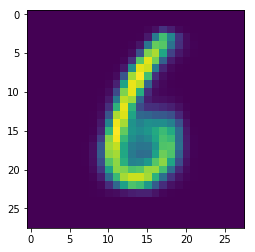

In [0]:
plt.imshow(grid_images.reshape(-1,28,28)[9])

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/14

---